# Hello compare Regularization Techniques

In [1]:
# Prerequisites
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

print("Python Version: ", sys.version)
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Numpy Version:  2.0.2
Pandas Version:  2.2.3


### Load Data, IMDB movie reviews

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

### Build and train base ANN model

In [3]:
model_base = Sequential([
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_base.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_base = model_base.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6939 - loss: 0.6160 - val_accuracy: 0.8479 - val_loss: 0.4345
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8828 - loss: 0.3757 - val_accuracy: 0.8608 - val_loss: 0.3549
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9115 - loss: 0.2710 - val_accuracy: 0.8855 - val_loss: 0.2924
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9312 - loss: 0.2090 - val_accuracy: 0.8767 - val_loss: 0.2981
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9456 - loss: 0.1700 - val_accuracy: 0.8885 - val_loss: 0.2803
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9551 - loss: 0.1484 - val_accuracy: 0.8878 - val_loss: 0.2835
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9622 - loss: 0.1233 - val_accuracy: 0.8828 - val_loss: 0.3064
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9701 - loss: 0.1083 - val_accuracy: 0.8776 - val_loss

### Build and train model with L2 Regularization

In [4]:
from tensorflow.keras import regularizers

model_l2 = Sequential([
    Dense(16,
          kernel_regularizer=regularizers.l2(0.002),
          activation="relu"),
    Dense(16, 
          kernel_regularizer=regularizers.l2(0.002),
          activation="relu"),
    Dense(1, activation="sigmoid")
])

model_l2.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_l2 = model_l2.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6758 - loss: 0.7140 - val_accuracy: 0.8587 - val_loss: 0.5142
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8808 - loss: 0.4657 - val_accuracy: 0.8730 - val_loss: 0.4203
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9042 - loss: 0.3722 - val_accuracy: 0.8857 - val_loss: 0.3776
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9173 - loss: 0.3180 - val_accuracy: 0.8865 - val_loss: 0.3588
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9282 - loss: 0.2871 - val_accuracy: 0.8861 - val_loss: 0.3552
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9396 - loss: 0.2653 - val_accuracy: 0.8757 - val_loss: 0.3753
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9419 - loss: 0.2562 - val_accuracy: 0.8846 - val_loss: 0.3614
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9476 - loss: 0.2412 - val_accuracy: 0.8845 - val_loss

### Plot Comparison of Validation losses

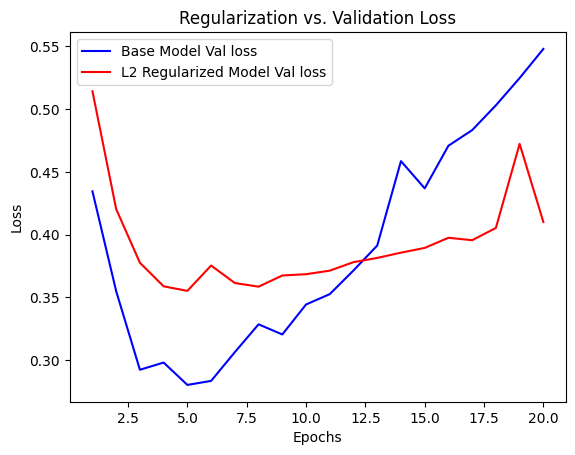

In [7]:
base_dict = history_base.history
l2_dict = history_l2.history
loss_values = base_dict["loss"]
base_model_loss = base_dict["val_loss"]
l2_model_loss = l2_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, base_model_loss, "b", label="Base Model Val loss")
plt.plot(epochs, l2_model_loss, "r", label="L2 Regularized Model Val loss")
plt.title("Regularization vs. Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Model with L2 regularization has become more resistant to overfitting, even though number of parameters has not changed


### Build and train model with Dropout

In [6]:
model_dropout = Sequential([
    Dense(16, activation="relu"),
    Dropout(0.5),
    Dense(16, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model_dropout.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_dropout = model_dropout.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5906 - loss: 0.6582 - val_accuracy: 0.8516 - val_loss: 0.5008
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7516 - loss: 0.5133 - val_accuracy: 0.8741 - val_loss: 0.3946
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8218 - loss: 0.4303 - val_accuracy: 0.8833 - val_loss: 0.3431
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8572 - loss: 0.3749 - val_accuracy: 0.8819 - val_loss: 0.3120
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8795 - loss: 0.3372 - val_accuracy: 0.8874 - val_loss: 0.2958
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9002 - loss: 0.2985 - val_accuracy: 0.8907 - val_loss: 0.2812
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9186 - loss: 0.2583 - val_accuracy: 0.8861 - val_loss: 0.2832
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9279 - loss: 0.2444 - val_accuracy: 0.8909 - val_loss

### Plot Comparison of Validation losses


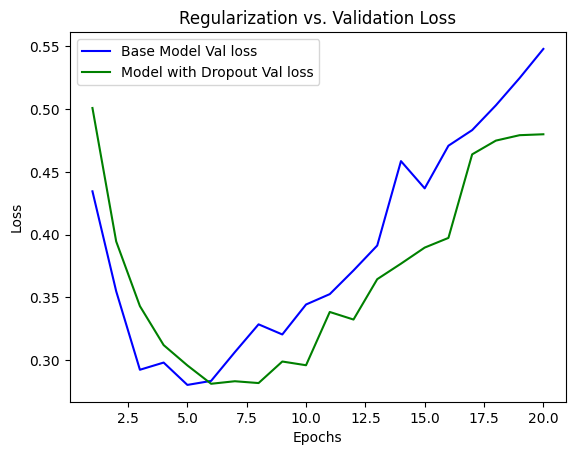

In [8]:
base_dict = history_base.history
dropout_dict = history_dropout.history
loss_values = base_dict["loss"]
base_model_loss = base_dict["val_loss"]
dropout_model_loss = dropout_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, base_model_loss, "b", label="Base Model Val loss")
plt.plot(epochs, dropout_model_loss, "g", label="Model with Dropout Val loss")
plt.title("Regularization vs. Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Model with dropout performs better than the base model